# Python Review

## Data structures

- **List** An ordered set of elements
- **Dictionary** An unordered key / value store. Each value can be accessed indexing into the key, e.g. `python_dict['a']`

In [62]:
# EXERCISE (google how to do it if you are stuck)

python_list = [1,2,3,7]
python_dict = {'a':3, 'd':5}

# Print each number in list
# INSERT CODE HERE

# Print each value in the dictionary
# INSERT CODE HERE

## JSON

A way to store data (lists, dictionaries, etc) in a string or file format. An example and exercise is below

In [63]:
import json

json_example = '''{
    "created_at": "Wed Nov 06 23:58:55 +0000 2019",
    "text": "Kleenex® Brand Underscores Importance of #Skin Care This Cold &amp; Flu Season  #skincare #beautytips  https://t.co/PWqB6MmQVw",
    "is_quote_status": false,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 0,
    "favorite_count": 5,
    "entities": {
        "hashtags": [
            {
                "text": "Skin",
                "indices": [41,46]
            },
            {
                "text": "skincare",
                "indices": [80,89]
            },
            {
                "text": "beautytips",
                "indices": [90,101]
            }
        ]
    },
    "favorited": false,
    "retweeted": false
}
'''

In [64]:
# EXERCISE (use google if you are stuck)

# Load the JSON example above (don't forget to run the cell) using
# the json.loads function
# INSERT CODE HERE

# Print how many times the tweet was retweeted ("retweet_count")
# INSERT CODE HERE

# Print the hashtags in the tweet
# INSERT CODE HERE

## Saving and Loading JSON to a file

Many times it's not convenient to keep on hitting a URL for a JSON, maybe the website is too slow or there is a limit on how many times a user can access it. In these cases, it's best to save the JSON to a file and read it.

In [65]:
# EXERCISE (use google if you are stuck)

# Save the JSON to a file named 'example.json'
# INSERT CODE HERE

# Load the JSON from file (using json.load)
# INSERT CODE HERE

# Acessing the Twitter API

## Package Requirements

We need to install the following packages into your Python environment

```
requests
requests_oauthlib
stylecloud
pandas
```


## What is an API?

An API (Application Programmer Interface) is a way a website/app allows a user to programmatically access data.

## Other ways of accessing data

1. Copy and paste data into a spreadsheet (or plain text file) and read with Python package `csv` or `pandas` (or if it's a text file, then loop through the lines) 

1. Scrape/parse the HTML with Python package *Beautiful Soup* (or equivalent)

## API vs. Other Methods

An API is more organized and the way the app wants you to access its data. However many websites or apps don't have an API, or it is too poorly designed. In those cases, it's better to use a more crude approach.

## API Authentication

We need to get the tokens from the Twitter development website, but first there are some steps involved and some forms to fill out.

1. Go to https://developer.twitter.com/en/apply/user.html

1. Login to your Twitter account or create a new user

1. Fill out the forms and select you are applying for educational use. It doesn't really matter what you write down as long as you meet the word length. Go through the entire process

1. After that is complete, click on your to your name at the top right corner, next to *Dashboard* (not *Dashboard* but next to it) and select *Apps*, then click on *Keys and Tokens*

1. Write down the four keys below

In [66]:
API_KEY = ''
API_SECRET = ''
ACCESS_TOKEN = ''
ACCESS_TOKEN_SECRET = ''

Now go here to create a new dev environment https://developer.twitter.com/en/account/environments and select *Full Archive* (Search API). Write down the name of your environment below

In [67]:
DEV_ENVIRONMENT_NAME = ''

Now we are ready to use requests

In [68]:
import requests
from requests_oauthlib import OAuth1

SEARCH_API_URL = 'https://api.twitter.com/1.1/tweets/search/fullarchive/{}.json'.format(DEV_ENVIRONMENT_NAME)

# Authentication uses OAuth1 as referenced in Twitter documentation
auth = OAuth1(API_KEY, API_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)



In [ ]:
query = {
    "query":"flu",
    "maxResults": "100",
    "fromDate":"201911010000", 
    "toDate":"201911062359"
}

response = requests.post(SEARCH_API_URL, auth=auth, json=query)

In [74]:
# Get the tweets from the requests response object
# See documentation at this link https://www.w3schools.com/python/ref_requests_response.asp
tweets = # INSERT CODE HERE
tweets = response.json() # DEBUG

# The first result in the
tweets['results'][0]

{'created_at': 'Wed Nov 06 23:58:55 +0000 2019',
 'id': 1192229910447894529,
 'id_str': '1192229910447894529',
 'text': 'Kleenex® Brand Underscores Importance of #Skin Care This Cold &amp; Flu Season  #skincare #beautytips  https://t.co/PWqB6MmQVw',
 'source': '<a href="https://ifttt.com" rel="nofollow">IFTTT</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 309395444,
  'id_str': '309395444',
  'name': 'Beauty Skin',
  'screen_name': '_Beauty_Skin',
  'location': 'USA',
  'url': 'https://bit.ly/2G4eCKS',
  'description': 'Info, tips & products for your skin! https://bit.ly/2G4eCKS',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 753,
  'friends_count': 645,
  'listed_count': 69,
  'favourites_count': 0,
  'statuses_count': 22812,
  'created_at': 'Thu Jun 02 01:09:43 +0000 2011',
  'u

In [134]:
#EXERCISE add text from tweets into corpus

corpus = ''
for tweet in tweets['results']:
    corpus = #INSERT CODE HERE
    corpus += ' ' + tweet['text']


corpus

' Kleenex® Brand Underscores Importance of #Skin Care This Cold &amp; Flu Season  #skincare #beautytips  https://t.co/PWqB6MmQVw RT @sblackmoore: Seriously, what the fuck is this "They\'ll overuse health care!" bullshit?\n\nHow do you even do that? \n\n"You keep getting th… @BryanLunduke Get yer flu shots, kids, get yer shots.\n\n(Not saying this was the case for Brian, but it\'s a good reminder of the need) RT @SChandraHerbert: Local pharmacies had run out of the vaccine, but our new urgent care centre is open to provide flu shots, and you don’… @ArtandDD_Sharon I ignore fear propaganda regarding the flu shot. A few weeks ago, I visited Mom in the nursing hom… https://t.co/t8b3sw485O @guanixim7 kkkkkkkkkk ah mano eu queria uma blusa do Flu tb RT @PrairiePhlox: Hi\nGet flu shots\nGet vaccinated\nTake the entire run of your goddamn antibiotics as prescribed\n\nIf you\'ve got some shit to… RT @peterongilford: @steeletalk @SChandraHerbert tweeted earlier today that most pharmacies have ru

In [135]:
#EXERCISE convert corpus to lowercase
corpus_lower = corpus.lower()

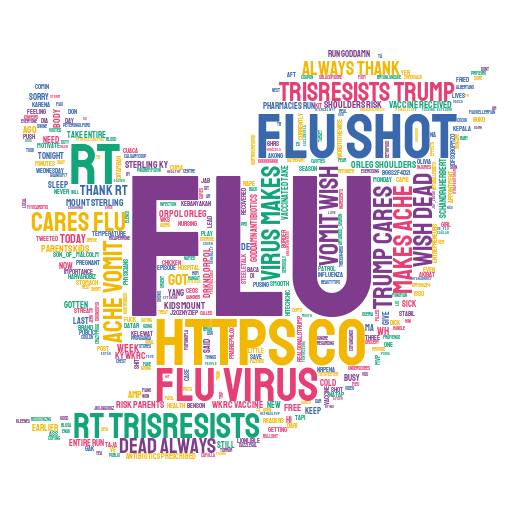

In [136]:
import stylecloud
from IPython.display import Image
import os

filename = 'wordcloud.png'

stylecloud.gen_stylecloud(text=corpus_lower, icon_name='fab fa-twitter', output_name=filename)
Image(filename=filename)

Now we will use a regular expression to remove everything except spaces and the letters a-z

In [129]:
import re
corpus_no_chars = ' '.join(corpus_lower.splitlines())
corpus_no_chars = re.sub(r'[^a-z ]', '', corpus_no_chars)
corpus_no_chars

' kleenex brand underscores importance of skin care this cold amp flu season  skincare beautytips  httpstcopwqbmmqvw rt sblackmoore seriously what the fuck is this theyll overuse health care bullshit  how do you even do that   you keep getting th bryanlunduke get yer flu shots kids get yer shots  not saying this was the case for brian but its a good reminder of the need rt schandraherbert local pharmacies had run out of the vaccine but our new urgent care centre is open to provide flu shots and you don artandddsharon i ignore fear propaganda regarding the flu shot a few weeks ago i visited mom in the nursing hom httpstcotbswo guanixim kkkkkkkkkk ah mano eu queria uma blusa do flu tb rt prairiephlox hi get flu shots get vaccinated take the entire run of your goddamn antibiotics as prescribed  if youve got some shit to rt peterongilford steeletalk schandraherbert tweeted earlier today that most pharmacies have run out of flu vaccines you can get one at rt sonofmalcolm fried chicken flu i